## 1. Installing required dependencies and github repo

In [1]:
!git clone https://github.com/ultralytics/yolov5  # cloning the yolov5 repo github
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12316, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 12316 (delta 0), reused 2 (delta 0), pack-reused 12313
Receiving objects: 100% (12316/12316), 11.52 MiB | 20.24 MiB/s, done.
Resolving deltas: 100% (8555/8555), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.5 MB/s 
     |████████████████████████████████| 145 kB 5.3 MB/s 
     |████████████████████████████████| 178 kB 43.2 MB/s 
     |████████████████████████████████| 1.1 MB 43.6 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 138 kB 48.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1

In [2]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [3]:
# setting up a folder to put the dataset 
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

## 2. Taking the dataset from roboflow

In [4]:
#Following lines are received from roboflow after annotating the images and dividing them into train, test, validation
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MiJbLB3gyzJ5xnggY7fG")
project = rf.workspace("kanigiri-naveen").project("auto-detection-n4tad")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Auto-Detection-1 in yolov5pytorch:: 100%|██████████| 314/314 [00:00<00:00, 714.09it/s]


## Training the YOLOv5 model with the hyper parameters 
1. img - mention the image size.
2. epochs - number of iterations.
3. weights - Initial weights.

In [5]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Auto-Detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-76-gc94736a torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

## Predicting the outputs for Test images

In [6]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Auto-Detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-76-gc94736a torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/datasets/Auto-Detection-1/test/images/Datacluster-Auto--112-_jpg.rf.5c417f9e16645bc408d91328186cab48.jpg: 416x416 2 Autos, Done. (0.024s)
image 2/15 /content/datasets/Auto-Detection-1/test/images/Datacluster-Auto--14-_jpg.rf.f23d17d460a009df3f71e6d4c9484dcc.jpg: 416x416 1 Auto, Done. (0.038s)
image 3/15 /content/datasets/Auto-

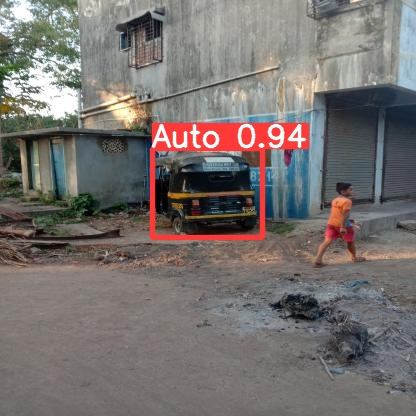

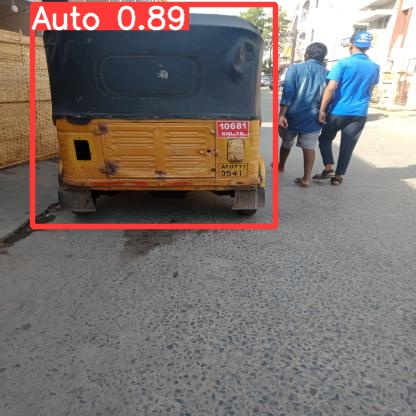

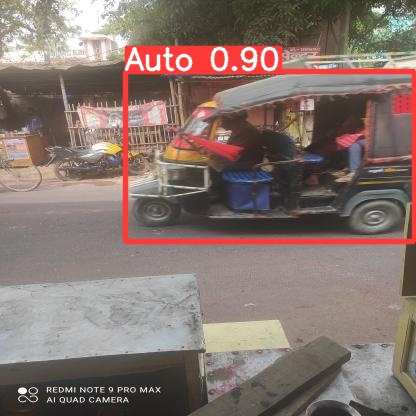

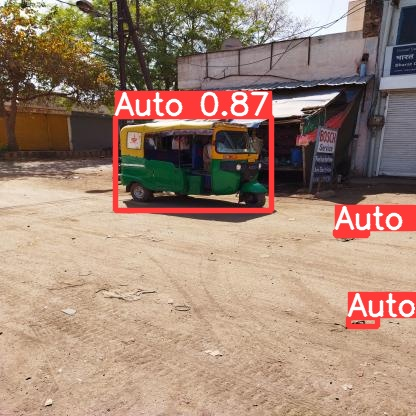

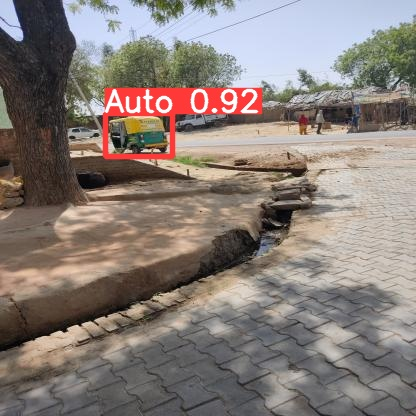

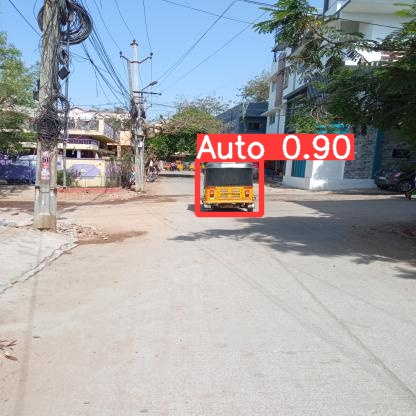

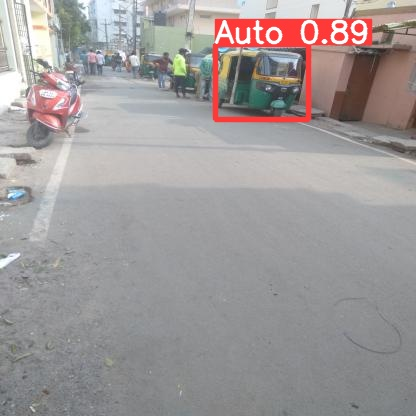

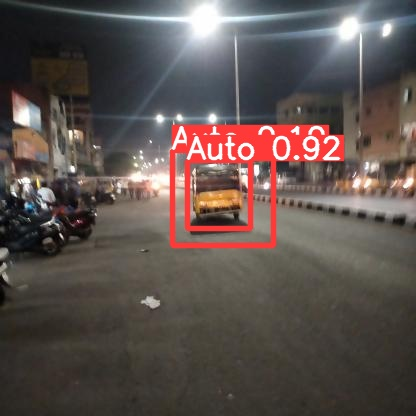

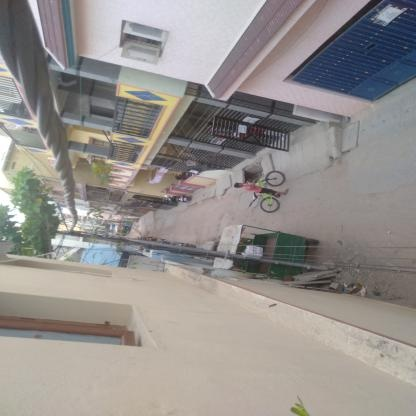

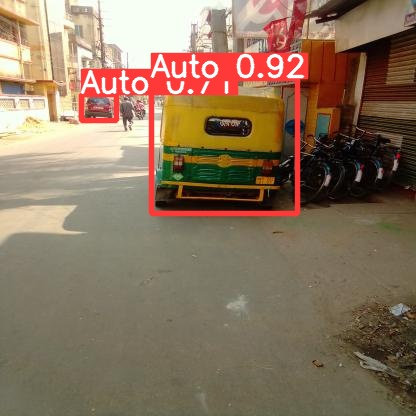

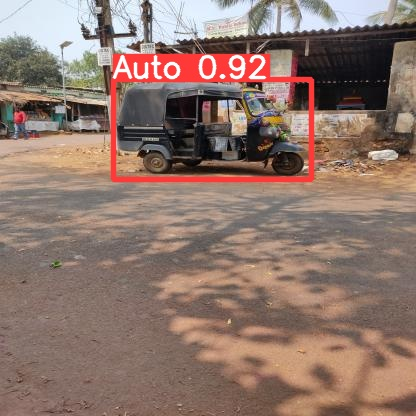

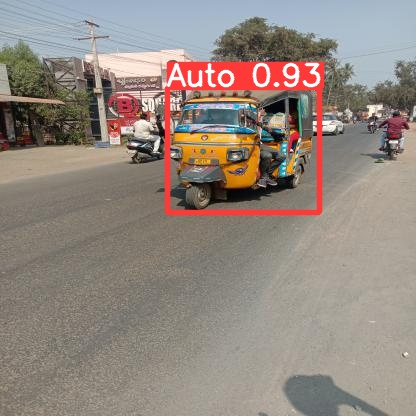

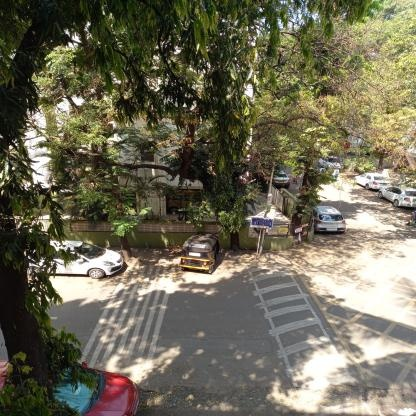

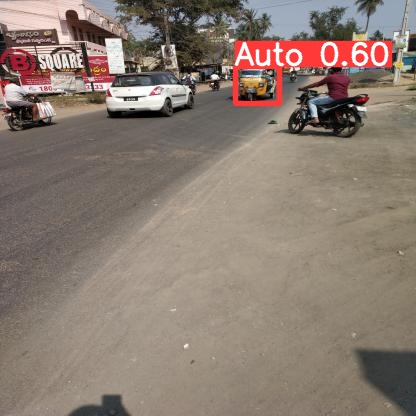

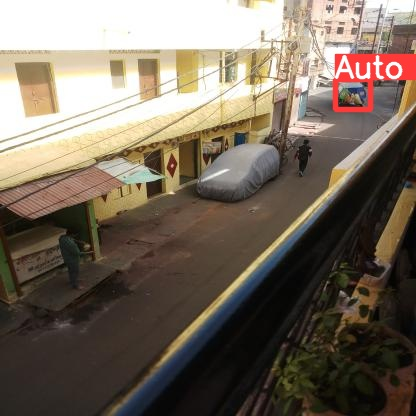

In [7]:
#Displaying the outputs predicted by the yolov5 model on the test images.

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")